<a href="https://colab.research.google.com/github/Haridharan05/Basic-Project-DS/blob/main/B_House_price_Predict_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Bengaluru_House_Data-2.csv')

In [ ]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
data.shape

(13320, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


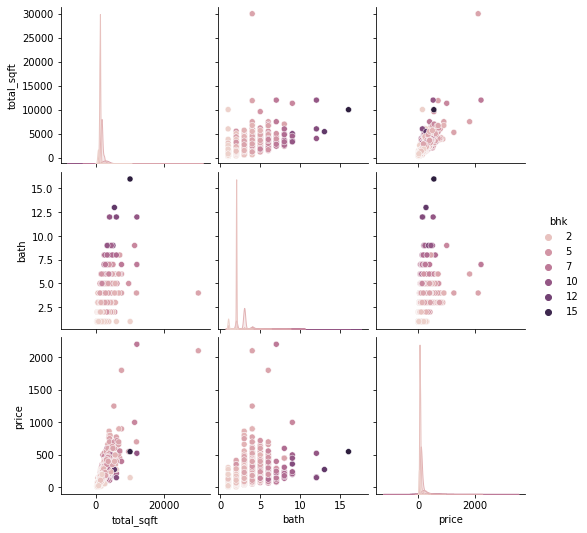

In [90]:
sns.pairplot(data=data, hue='bhk')
plt.show()

In [ ]:
for column in data.columns:
  print(data[column].value_counts())
  print('*'*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [ ]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
data.drop(columns=['area_type','availability','balcony'],inplace=True)

In [ ]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [ ]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [ ]:
data['location'] = data['location'].fillna('Sarjapur Road')

In [ ]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [ ]:
data['size'] = data['size'].fillna('2 BHK')

In [ ]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   society     7818 non-null   object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [ ]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [ ]:
data[data.bhk > 20]

,location,size,society,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,NaN,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,NaN,2400,40.0,660.0,43


In [ ]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def convertRange(x):

  temp = x.split('-')
  if len (temp) == 2:
    return (float(temp[0]) + float (temp[1]))/2

  try:
    return  float(x)

  except:
    return None

In [ ]:
data['total_sqft'] = data['total_sqft'].apply(convertRange)

In [ ]:
data.head()

,location,size,society,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,NaN,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,NaN,1200.0,2.0,51.00,2


**Price Per Square feet**

In [ ]:
data['price_per_sqft'] = data['price'] *100000 / data['total_sqft']

In [ ]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [ ]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [ ]:
data['location'] = data['location'] . apply (lambda x : x.strip())
location_count = data['location'].value_counts()

In [ ]:
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [ ]:
data['location'] = data['location'].apply (lambda x : 'other' if x in location_count_less_10 else x)

In [ ]:
data['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

**Outlier detection and removal**

In [ ]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
(data['total_sqft'] / data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [ ]:
data = data[((data['total_sqft'] / data['bhk']) >=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [ ]:
data.shape

(12530, 8)

In [ ]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key,subdf in df.groupby ('location'):
    m = np.mean(subdf.price_per_sqft)

    st = np.std(subdf.price_per_sqft)

    gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_output = pd.concat([df_output,gen_df] , ignore_index = True)

  return df_output

data = remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [ ]:
def bhk_outlier_remover(df):
    exclude_indices = np . array ([])
    for location , location_df in df.groupby('location'):
      bhk_stats = {}

      for bhk , bhk_df in location_df.groupby('bhk'):
         bhk_stats[bhk] = {
             'mean' : np.mean(bhk_df.price_per_sqft),
             'std' : np.std(bhk_df.price_per_sqft),
             'count' : bhk_df.shape[0]
         }
      for bhk,bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count'] > 5:
          exclude_indices = np . append (exclude_indices, bhk_df[bhk_df.price_per_sqft <(stats['mean'])] . index.values)
    return df.drop(exclude_indices,axis = 'index')
  
  

In [ ]:
data = bhk_outlier_remover(data)

In [ ]:
data.shape

(7361, 8)

In [ ]:
data

,location,size,society,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,NaN,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,NaN,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,NaN,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,Bhsic C,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,NaN,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10292,other,2 BHK,NaN,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,NaN,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,OlarkLa,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,NaN,812.0,1.0,26.0,1,3201.970443


In [ ]:
data.drop(columns = ['size' , 'price_per_sqft' ,'society'] , inplace = True)

In [ ]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
data.to_csv('Cleaned_dat.csv')

In [ ]:
X = data.drop (columns = ['price']) 
y = data ['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(5888, 4)
(1473, 4)


**Applying Linear Regression**

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse = False) , ['location']),remainder = 'passthrough')

In [ ]:
scaler = StandardScaler()

In [ ]:
lr = LinearRegression(normalize = True)

In [ ]:
pipe = make_pipeline(column_trans,scaler , lr)

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [ ]:
y_pred_lr = pipe.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_lr)

0.8233196098569724

**Applying Lasso**

In [ ]:
lasso = Lasso()

In [ ]:
pipe = make_pipeline(column_trans , scaler , lasso)

In [ ]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8128285650772719

**Applying Ridge**

In [ ]:
ridge = Ridge()

In [ ]:
pipe = make_pipeline(column_trans , scaler , ridge)

In [ ]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8234146633312639

In [ ]:
print("No Regularization: " , r2_score(y_test , y_pred_lr))
print('Lasso : ' , r2_score(y_test , y_pred_lasso))
print('Ridge : ' , r2_score(y_test , y_pred_ridge))

No Regularization:  0.8233196098569724
Lasso :  0.8128285650772719
Ridge :  0.8234146633312639


In [69]:
data

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2
10293,other,1800.0,1.0,200.0,1
10296,other,1353.0,2.0,110.0,2
10297,other,812.0,1.0,26.0,1


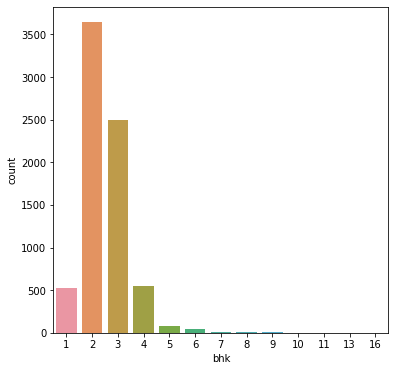

In [72]:
plt.figure(figsize=(6,6))
sns.countplot(x='bhk',data=data)

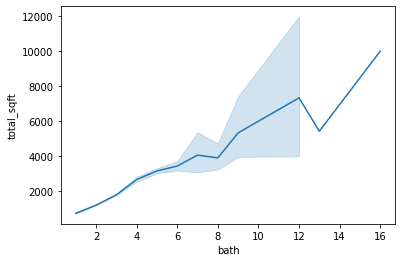

In [73]:
sns.lineplot(x="bath", y="total_sqft", data=data)

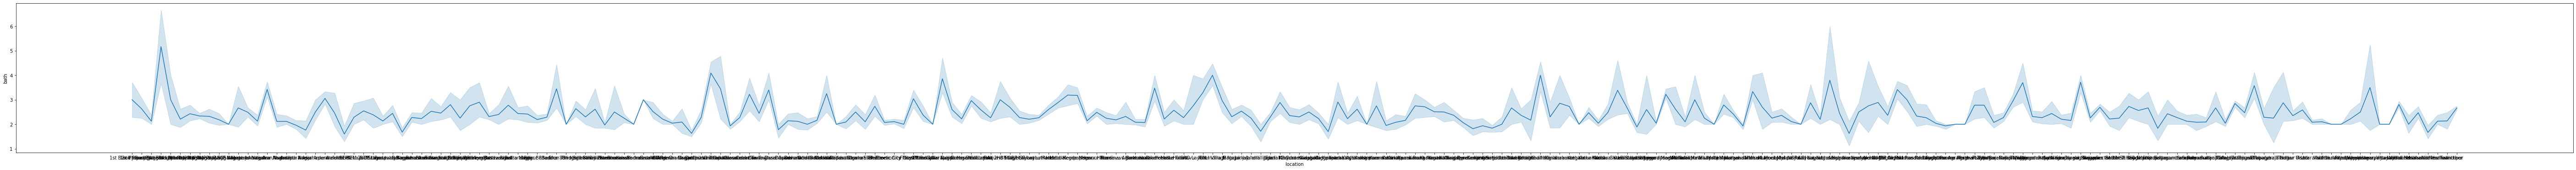

In [77]:
plt.figure(figsize=(100,6))
sns.lineplot(x="location",y='bath',data=data)

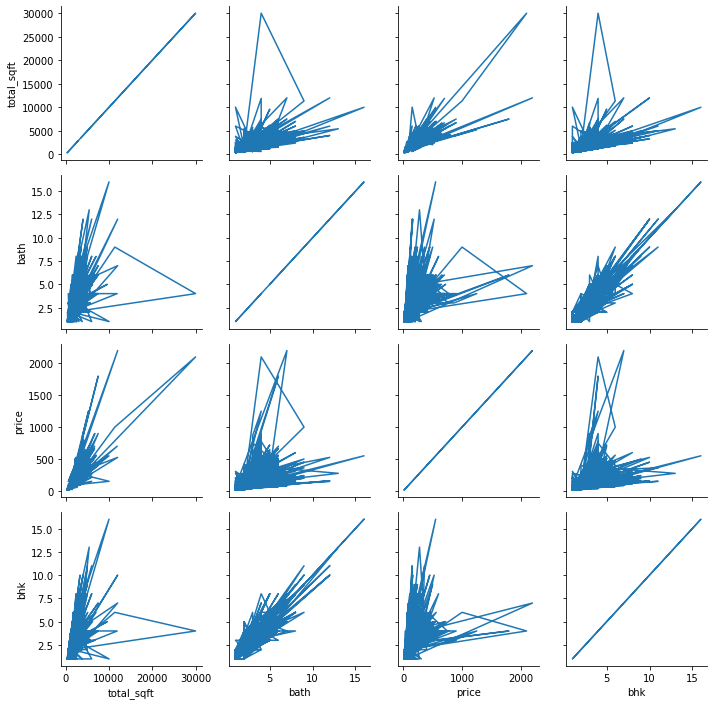

In [78]:
plot = sns.PairGrid(data)
plot.map(plt.plot)


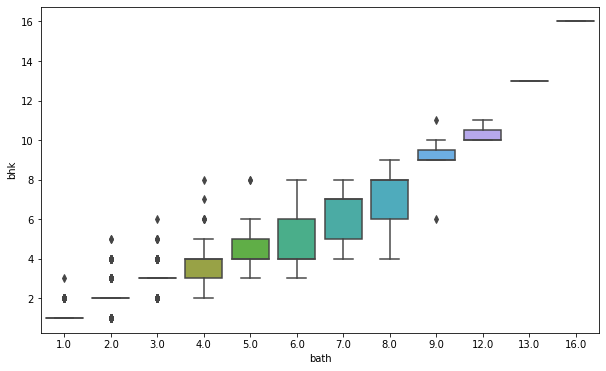

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bath', y='bhk', data=data)
plt.show()


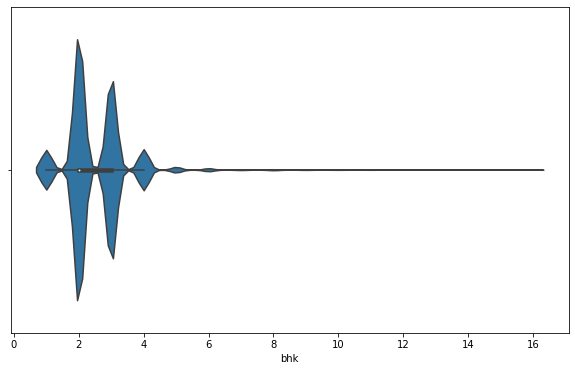

In [87]:
plt.figure(figsize=(10,6))
sns.violinplot(x='bhk', data=data)
plt.show()